<a href="https://colab.research.google.com/github/JonasZimmer1994/DataScienceProjekt/blob/master/Data_Science_Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data Import

In [1]:
!git clone https://github.com/JonasZimmer1994/DataScienceProjekt.git

Cloning into 'DataScienceProjekt'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 12 (delta 2), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [137]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [0]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import string
import re
from collections import  Counter
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

Zunächst werden die Dateien in Form von DataFrames importiert.

In [0]:
train = pd.read_csv('/content/DataScienceProjekt/train.csv') 
test = pd.read_csv('/content/DataScienceProjekt/test.csv')

###Data Visualization

Zur Übersicht werden die Daten erst einmal ausgegeben.

In [140]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


die Form der Daten sieht wie folgt aus

In [141]:
print('There are {} rows and {} columns in train'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in train'.format(test.shape[0],test.shape[1]))

There are 7613 rows and 5 columns in train
There are 3263 rows and 4 columns in train


um die Daten genauer anzusehen, werden zunächst Beispiel Tweets angezeigt. Dazu wird angeschaut bei welchen Tweets es sich um Disaster Tweets handelt.

In [142]:
for i in range(30):
    print(train.text[i], "        Desaster Tweet:", train.target[i])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all         Desaster Tweet: 1
Forest fire near La Ronge Sask. Canada         Desaster Tweet: 1
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected         Desaster Tweet: 1
13,000 people receive #wildfires evacuation orders in California          Desaster Tweet: 1
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school          Desaster Tweet: 1
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires         Desaster Tweet: 1
#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas         Desaster Tweet: 1
I'm on top of the hill and I can see a fire in the woods...         Desaster Tweet: 1
There's an emergency evacuation happening now in the building across the street         Desaster Tweet: 1
I'm afraid that the t

Es wird die Klassenverteilung geplottet

Text(0, 0.5, 'samples')

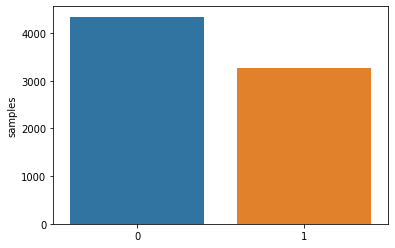

In [143]:
x=train.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

Um sich ein genaueres Bild von Disaster vs Non-Disaster Tweets zu machen, werden einige Eigenschaften von beiden Arten von Tweets gegenübergestellt.

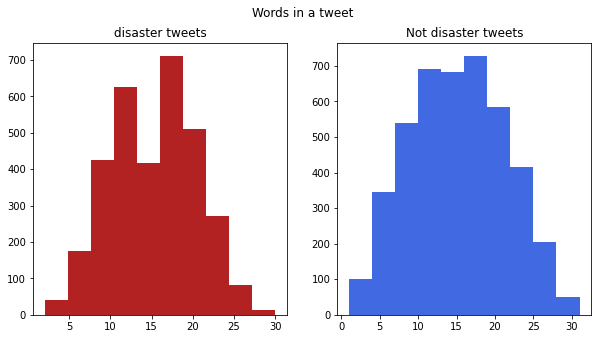

In [144]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='firebrick')
ax1.set_title('disaster tweets')
tweet_len=train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='royalblue')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

anhand der Wort Menge kann man erkennen, dass disaster Tweets tendenziell weniger Wörter beinhalten.

Text(0.5, 0.98, 'Average word length in each tweet')

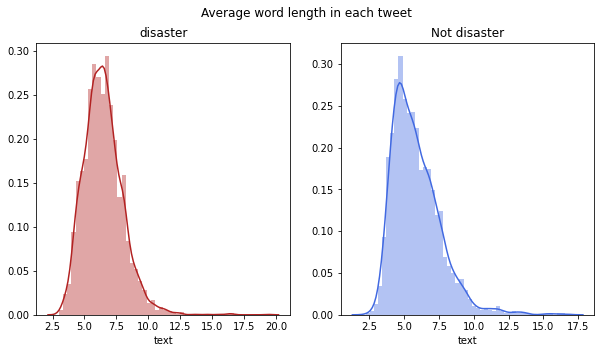

In [145]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train[train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='firebrick')
ax1.set_title('disaster')
word=train[train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='royalblue')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

anhand der Wortlänge lässt sich kein Unterschied erkennen.

In [0]:
def create_corpus(target):
    corpus=[]
    
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [0]:
disaster = create_corpus(1)
non_disaster = create_corpus(0)

In [148]:
print(disaster)

['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all', 'Forest', 'fire', 'near', 'La', 'Ronge', 'Sask.', 'Canada', 'All', 'residents', 'asked', 'to', "'shelter", 'in', "place'", 'are', 'being', 'notified', 'by', 'officers.', 'No', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'orders', 'are', 'expected', '13,000', 'people', 'receive', '#wildfires', 'evacuation', 'orders', 'in', 'California', 'Just', 'got', 'sent', 'this', 'photo', 'from', 'Ruby', '#Alaska', 'as', 'smoke', 'from', '#wildfires', 'pours', 'into', 'a', 'school', '#RockyFire', 'Update', '=>', 'California', 'Hwy.', '20', 'closed', 'in', 'both', 'directions', 'due', 'to', 'Lake', 'County', 'fire', '-', '#CAfire', '#wildfires', '#flood', '#disaster', 'Heavy', 'rain', 'causes', 'flash', 'flooding', 'of', 'streets', 'in', 'Manitou,', 'Colorado', 'Springs', 'areas', "I'm", 'on', 'top', 'of', 'the', 'hill', 'and', 'I', 'can', 'see', 'a', 'fire', 'in', 'the', 'woods...

Überprüfe Anzahl an Hashtags pro Tweet

Text(0.5, 0.98, 'Number of Hashtags in each tweet')

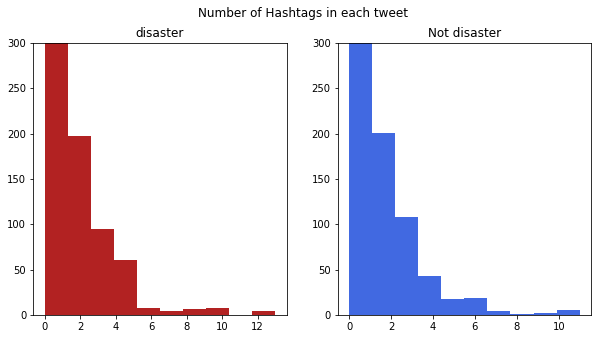

In [149]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
hashtags=train[train['target']==1]['text'].str.split().apply(lambda x : sum(i.startswith('#') for i in x))
ax1.hist(hashtags,color='firebrick')
ax1.set_ylim(0, 300)
ax1.set_title('disaster')
hashtags=train[train['target']==0]['text'].str.split().apply(lambda x : sum(i.startswith('#') for i in x))
ax2.hist(hashtags,color='royalblue')
ax2.set_ylim(0, 300)
ax2.set_title('Not disaster')
fig.suptitle('Number of Hashtags in each tweet')

viele Tweets haben keine Hashtags. Tendenziell haben disaster Tweets eher weniger Hashtags. Jedoch nicht signifikant.

Welches sind die am häufigsten verwendeten Wörter?

In [0]:
def common_words(corpus):
  counter=Counter(corpus)
  most=counter.most_common()
  x=[]
  y=[]
  for word,count in most[:40]:
      if (word not in stop) :
        x.append(word)
        y.append(count)

  return x, y

In [0]:
disaster_x, disaster_y = common_words(disaster)
non_disaster_x, non_disaster_y = common_words(non_disaster)

Text(0.5, 1.0, 'non disaster')

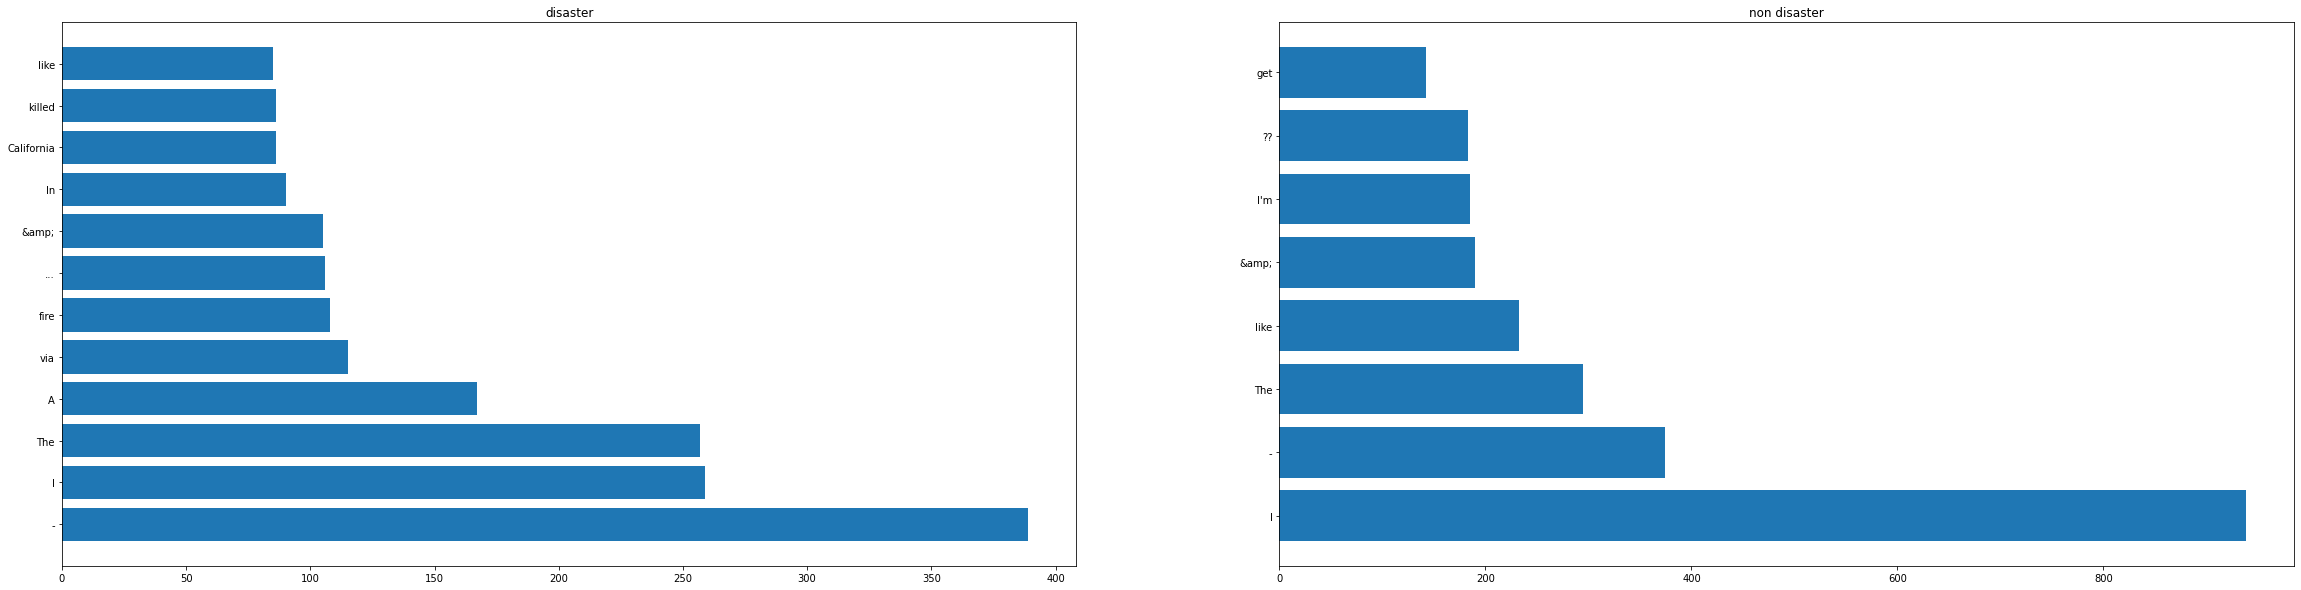

In [155]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(40,10))
ax1.barh(disaster_x, disaster_y)
ax1.set_title('disaster')

ax2.barh(non_disaster_x, non_disaster_y)
ax2.set_title('non disaster')

###Data Cleaning:

In [0]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

In [164]:
remove_punct(train.text[0])

'Our Deeds are the Reason of this earthquake May ALLAH Forgive us all'

In [165]:
remove_punct(train.text[15])

'Whats up man'

In [166]:
train.text[15]

"What's up man?"

In [0]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [0]:
def clean_stopwords(text):
    res = []
    for word in text:
        if word not in stop:
            res.append(word)
    return res